# Dataset

This case requires to develop a customer segmentation to define marketing strategy. The
sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.
https://www.kaggle.com/datasets/arjunbhasin2013/ccdata

It consist of:

 
 - CUSTID : Identification of Credit Card holder (Categorical)

 - BALANCE : Balance amount left in their account to make purchases (

 - BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 =                  frequently   updated, 0 = not frequently updated)

 - PURCHASES : Amount of purchases made from account

 - ONEOFFPURCHASES : Maximum purchase amount done in one-go

 - INSTALLMENTSPURCHASES : Amount of purchase done in installment

 - CASHADVANCE : Cash in advance given by the user

 - PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 =      frequently purchased, 0 = not frequently purchased)

 - ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently       purchased, 0 = not frequently purchased)

 - PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 =     frequently done,
  0 = not   frequently done)

 - CASHADVANCEFREQUENCY : How frequently the cash in advance being paid

 - CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"

 - PURCHASESTRX : Numbe of purchase transactions made

 - CREDITLIMIT : Limit of Credit Card for user

 - PAYMENTS : Amount of Payment done by user

 - MINIMUM_PAYMENTS : Minimum amount of payments made by user

 - PRCFULLPAYMENT : Percent of full payment paid by user

 - TENURE : Tenure of credit card service for user

# Aim

The aim of this project is to apply unsupervised learning techniques to Cluster the customers  And choose the best Algorithem to do that.
Then choose which offer from list of offers suitable for each cluster. 

# Importing libraries

In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.mixture import GaussianMixture
from sklearn.manifold import TSNE
%matplotlib inline
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.impute import KNNImputer
warnings.filterwarnings(action="ignore")
pd.options.display.max_rows = 10000

# Reading Data

In [6]:
# Read data and print shape
df = pd.read_csv('CC GENERAL.csv')
df_ = df.copy() 

In [7]:
df_.head(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# Feature Engineering

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
df_.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [6]:
df_.isnull().sum().sort_values(ascending=False)

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
CUST_ID                               0
BALANCE                               0
PRC_FULL_PAYMENT                      0
PAYMENTS                              0
PURCHASES_TRX                         0
CASH_ADVANCE_TRX                      0
CASH_ADVANCE_FREQUENCY                0
PURCHASES_INSTALLMENTS_FREQUENCY      0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_FREQUENCY                   0
CASH_ADVANCE                          0
INSTALLMENTS_PURCHASES                0
ONEOFF_PURCHASES                      0
PURCHASES                             0
BALANCE_FREQUENCY                     0
TENURE                                0
dtype: int64

In [7]:
df_.duplicated().sum()
print(df_.duplicated().value_counts()) 

False    8950
dtype: int64


In [8]:
#check how many object tybe do we have 
cat_col = df_.select_dtypes(include=['object']).columns
print(cat_col)

Index(['CUST_ID'], dtype='object')


In [9]:
#exclude this column
num_col = df_.select_dtypes(exclude=['object']).columns
print(num_col)

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')


In [10]:
df_[num_col].corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531283,0.322802,0.398684,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095843,0.065008,0.132569,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356963,0.603264,0.093860,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319724,0.567292,0.048755,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256499,0.384084,0.132172,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303985,0.453238,0.140107,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119788,0.103464,0.003030,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295038,0.243537,-0.030327,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060755,0.085551,0.030073,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132616,0.183192,0.098838,-0.249773,-0.133372


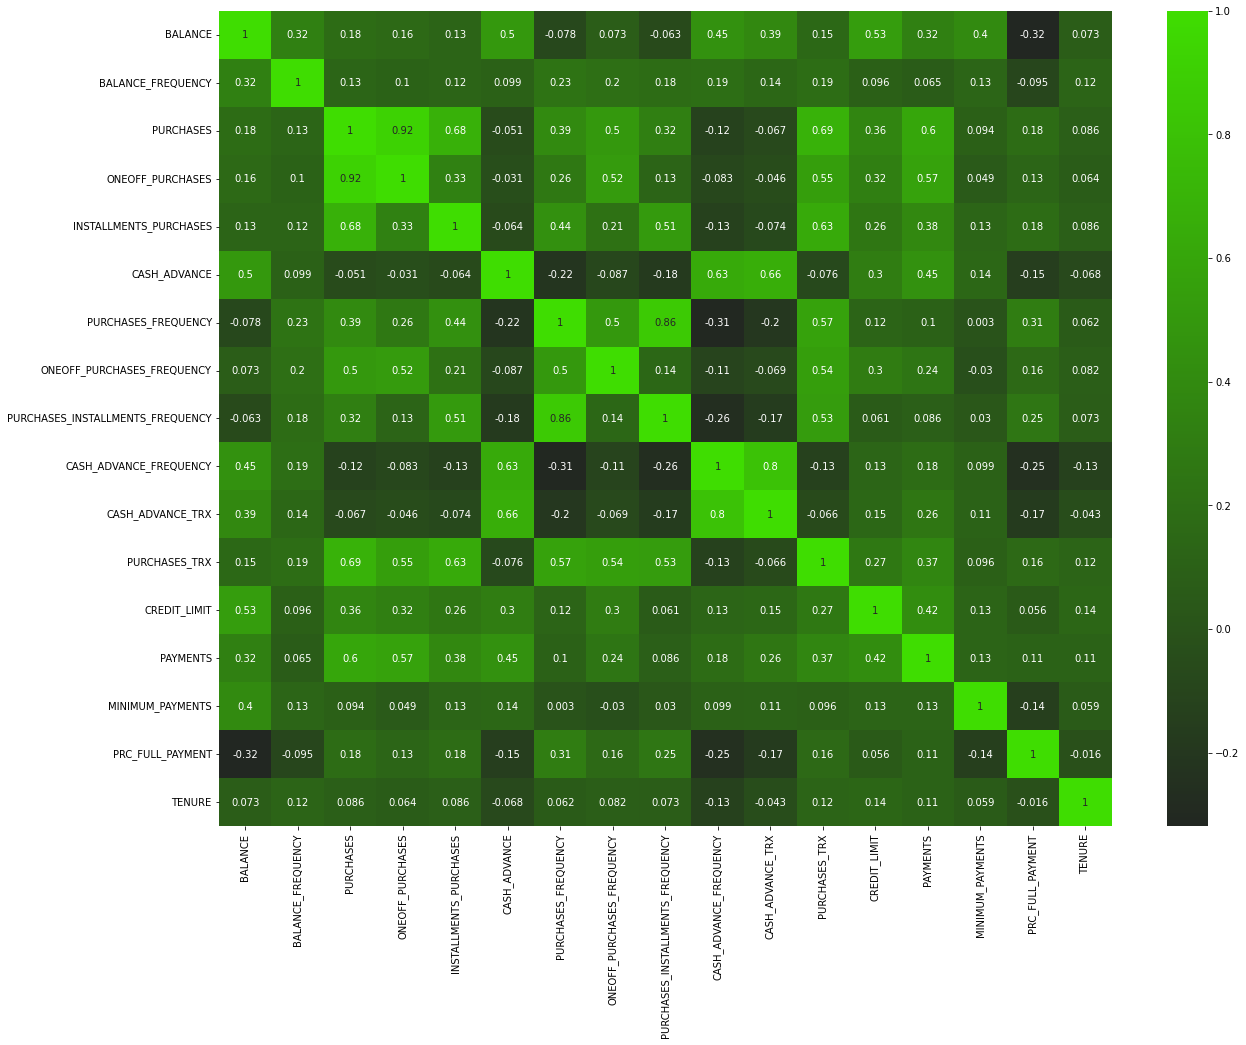

In [11]:
plt.figure(figsize=(20,15))
cmap = sns.dark_palette("#3fdd01", as_cmap=True)
map = sns.heatmap(df_[num_col].corr(),annot=True,cmap=cmap)

In [12]:
# plt.figure(figsize=(15,12))
# cmap = sns.light_palette("#3fdd01", as_cmap=True)
# map = sns.heatmap(df_[num_col].corr(),annot=True,cmap=cmap)

In [13]:
# plt.subplots(figsize=(20,15))
# sns.heatmap(df_[num_col].corr(),annot = True);

array([[<AxesSubplot:title={'center':'BALANCE'}>,
        <AxesSubplot:title={'center':'BALANCE_FREQUENCY'}>,
        <AxesSubplot:title={'center':'PURCHASES'}>,
        <AxesSubplot:title={'center':'ONEOFF_PURCHASES'}>],
       [<AxesSubplot:title={'center':'INSTALLMENTS_PURCHASES'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE'}>,
        <AxesSubplot:title={'center':'PURCHASES_FREQUENCY'}>,
        <AxesSubplot:title={'center':'ONEOFF_PURCHASES_FREQUENCY'}>],
       [<AxesSubplot:title={'center':'PURCHASES_INSTALLMENTS_FREQUENCY'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE_FREQUENCY'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE_TRX'}>,
        <AxesSubplot:title={'center':'PURCHASES_TRX'}>],
       [<AxesSubplot:title={'center':'CREDIT_LIMIT'}>,
        <AxesSubplot:title={'center':'PAYMENTS'}>,
        <AxesSubplot:title={'center':'MINIMUM_PAYMENTS'}>,
        <AxesSubplot:title={'center':'PRC_FULL_PAYMENT'}>],
       [<AxesSubplot:title={'center':'TENURE'

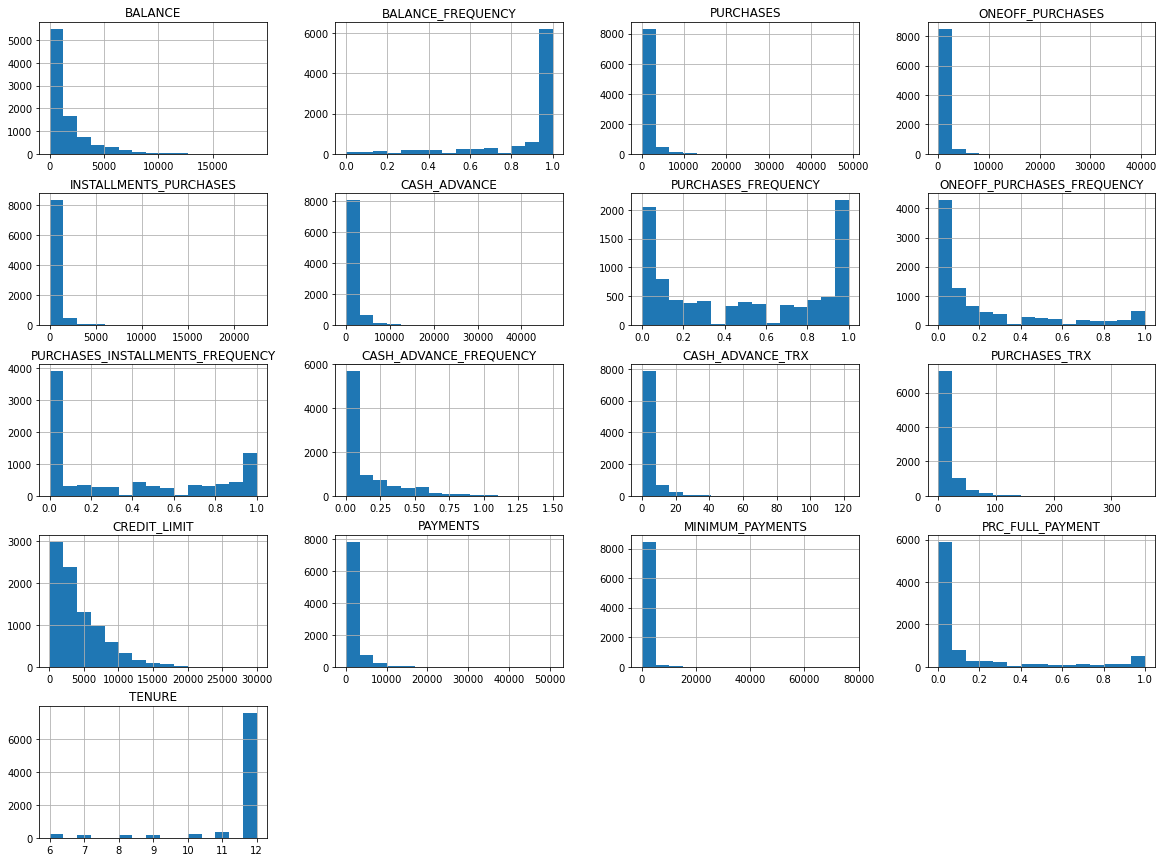

In [14]:
df_[num_col].hist(bins=15, figsize=(20, 15), layout=(5, 4))

# Handle Missing Values

- The idea in kNN methods is to identify ‘k’ samples in the dataset that are similar or
close in the space. Then we use these ‘k’ samples to estimate the value of the missing
data point
- Each sample’s missing values are imputed using the mean value of the ‘k’-neighbors
found in the dataset.

In [12]:


imputer = KNNImputer()
df_1 = pd.DataFrame(imputer.fit_transform(df_[num_col]),columns=df_[num_col].columns)
df_1.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

# Scalling using Min Max

- min max will keep the distrbution of the data as it is

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_1[:] = scaler.fit_transform(df_1)


# Power transforms

- - Power transforms are a technique for transforming numerical input or output variables to have a uniform or a Gaussian probability distribution. A power transform will make the probability distribution of a variable more Gaussian.

- This is often described as removing a skew in the distribution, although more generally described as stabilizing the variance of the distribution.

In [14]:
from sklearn.preprocessing import PowerTransformer
power_transformer = PowerTransformer()
power_transformer.fit(df_1)

df_1[:] = power_transformer.transform(df_1)

df_1.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03
mean,8.256586e-17,-4.699903e-16,1.651317e-16,1.079707e-16,8.574147e-17,1.587805e-17,6.668781e-17,-2.540488e-17,-7.462683e-17,1.492537e-16,-8.574147e-17,-1.016195e-16,-3.937756e-16,2.540488e-17,9.526830e-17,-6.986342e-17,-2.540488e-17
std,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00
min,-1.193820e+00,-1.997716e+00,-1.035396e+00,-7.725181e-01,-8.708587e-01,-7.599812e-01,-1.278866e+00,-9.033151e-01,-1.004445e+00,-8.795456e-01,-8.129285e-01,-1.113225e+00,-2.038389e+00,-1.440190e+00,-1.321458e+00,-6.778889e-01,-2.532355e+00
25%,-9.985006e-01,-5.989922e-01,-9.426759e-01,-7.725181e-01,-8.708587e-01,-7.599812e-01,-1.015926e+00,-9.033151e-01,-1.004445e+00,-8.795456e-01,-8.129285e-01,-9.544058e-01,-9.524292e-01,-8.309277e-01,-7.745855e-01,-6.778889e-01,4.221090e-01
50%,-9.283448e-02,6.286119e-01,-2.860066e-01,-6.334976e-01,-4.402391e-01,-7.599812e-01,1.196567e-01,-9.222973e-02,-2.738452e-01,-8.795456e-01,-8.129285e-01,-1.597018e-01,-2.345275e-01,-2.229178e-01,-3.929230e-01,-6.778889e-01,4.221090e-01
75%,7.908976e-01,6.286119e-01,7.420497e-01,7.492745e-01,7.859384e-01,8.519016e-01,1.050283e+00,9.780771e-01,1.069884e+00,1.011032e+00,8.909931e-01,7.185929e-01,8.889450e-01,7.061095e-01,6.603480e-01,8.541173e-01,4.221090e-01
max,2.038402e+00,6.286119e-01,2.135140e+00,2.147822e+00,2.084662e+00,2.010305e+00,1.218860e+00,1.732554e+00,1.377136e+00,1.906345e+00,2.019437e+00,2.107712e+00,2.266282e+00,2.163853e+00,2.340196e+00,1.873638e+00,4.221090e-01


# PCA

- PCA is a linear method. That is it can only be applied to datasets which are linearly separable
- finding a few orthogonal linear combinations (principal components) of the original
- variables with the largest variance
- The first principal component captures most of the variance in the data.
- The second principal component is orthogonal to the first principal component and captures the  remaining variance
- which is left of first principal component
- and so on
- These principal components are uncorrelated
- and are ordered in such a way that the first several principal components explain most of the variance of the original data

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(df_1)
dfc = pca.transform(df_1)

In [17]:
dfc.shape

(8950, 2)

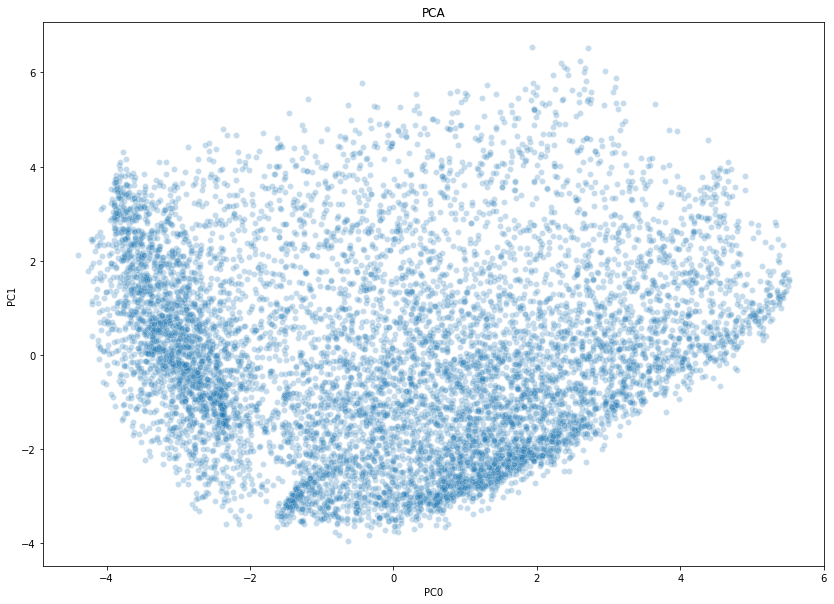

In [12]:
fig, ax = plt.subplots(figsize=(14, 10))


sns.scatterplot(x=dfc[:, 0], y=dfc[:, 1], alpha=0.25, ax=ax)

plt.xlabel("PC0")
plt.ylabel("PC1")
plt.title("PCA")
plt.show()

# KernelPCA

- Working well with  non-linear datasets
- Kernel PCA uses a kernel function to project dataset into a higher dimensional feature space, where it is linearly separable


- Kernel PCA is better here
- we have many dimensional soi don't expect to be linearly separable 

- the Kernal Pca is better on this data since it has many features

In [21]:
from sklearn.decomposition import KernelPCA
transformer = KernelPCA(n_components=2, kernel="rbf",gamma=0.03)
KPca = transformer.fit_transform(df_1)

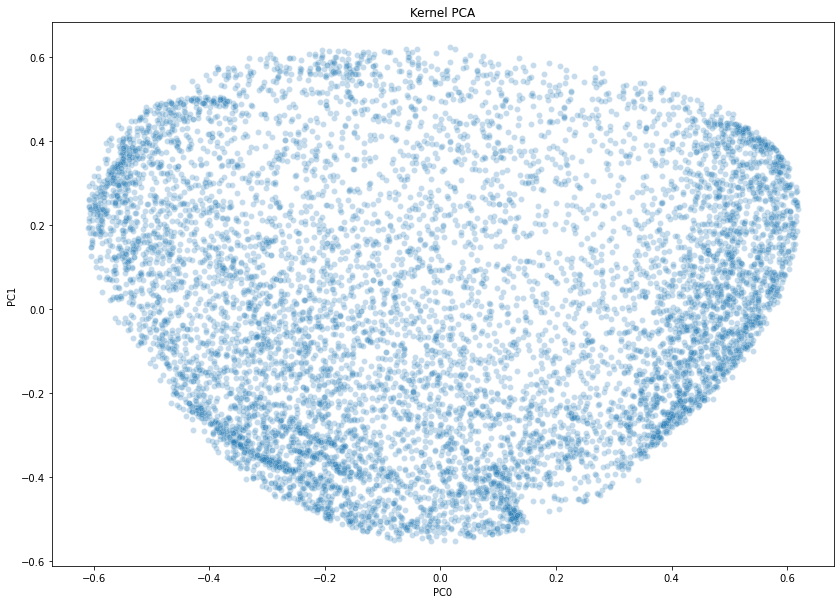

In [22]:
fig, ax = plt.subplots(figsize=(14, 10))
sns.scatterplot(x=KPca[:, 0], y=KPca[:, 1], alpha=0.25, ax=ax)
plt.xlabel("PC0")
plt.ylabel("PC1")
plt.title("Kernel PCA")
plt.show()

# T_sne

- t-SNE is an unsupervised, non-linear technique primarily used for 
- data exploration and visualizing high-dimensional data.
- t-SNE gives you a feel or intuition of how the data is arranged in a high-dimensional space

# Different between T_sne and PCA:

- The first thing to note is that PCA was developed in 1933 while t-SNE was developed in 2008
-  PCA is a linear dimension reduction technique that seeks to maximize variance and preserves large pairwise distances. In other words, things that are different end up far apart. This can lead to poor visualization especially when dealing with non-linear manifold structures
- t-SNE differs from PCA by preserving only small pairwise distances or local similarities whereas PCA is concerned with preserving large pairwise distances to maximize variance

# How is it work?

# Step 1
- measure similarities between points in the high dimensional space.
- Think of a bunch of data points scattered on a 2D space.
- For each data point (xi) we’ll center a Gaussian distribution over that point.
- Then we measure the density of all points (xj) under that Gaussian distribution.
- Then renormalize for all points. This gives us a set of probabilities (Pij) for all points. Those probabilities are proportional to the similarities.
# Step 2 
- similar to step 1, but instead of using a Gaussian distribution you use a Student t-distribution with one degree of freedom, which is also known as the Cauchy distribution 
- This gives us a second set of probabilities (Qij) in the low dimensional space. 
- Student t-distribution has heavier tails than the normal distribution. The heavy tails allow for better modeling of far apart distances.
# Step 3
- we want these set of probabilities from the low-dimensional space (Qij) to reflect those of the high dimensional space (Pij) as best as possible.

In [23]:
from sklearn.manifold import TSNE
tsne = TSNE(perplexity=3, init="pca").fit_transform(KPca)


In [24]:
def t_sne(embeddings, labels, title):
    fig, ax = plt.subplots(figsize=(14, 10))
    sns.scatterplot(
        x=embeddings[:, 0],
        y=embeddings[:, 1],
        hue=labels,
        palette=sns.color_palette("colorblind", len(set(labels))),
        alpha=0.3,
        legend="full"
    )

    plt.xlabel("Embedding 0")
    plt.ylabel("Embedding 1")
    plt.title(title)
    plt.show()

# Unsupervised Algorithm

# Dendrogram

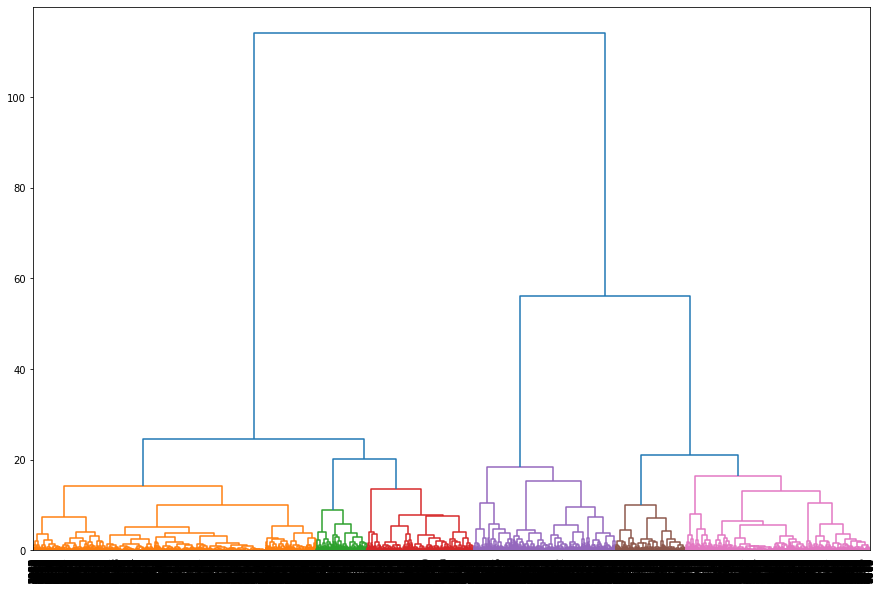

In [39]:
plt.figure(figsize = (15,10))
dendrogram(linkage(df_1,method = 'ward'),leaf_rotation = 90, p = 5, color_threshold= 20, leaf_font_size=10, truncate_mode = 'none')
plt.show()

# KMeans

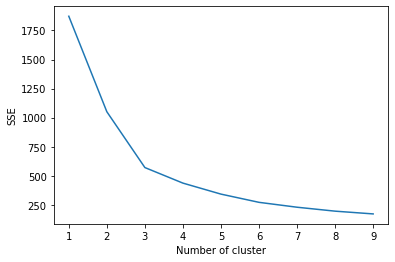

In [17]:
from sklearn.cluster import KMeans
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(KPca)
    sse[k] = kmeans.inertia_
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

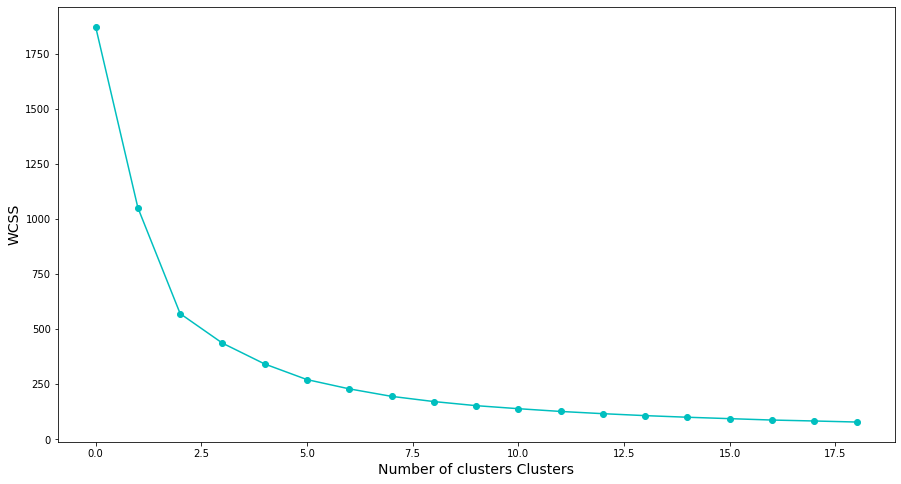

In [18]:
wcss= []
range_values = range(1, 20)
for i in range_values:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(KPca)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,8)) 
plt.plot(wcss, 'bo-', color='c')
plt.xlabel('Number of clusters Clusters', fontsize=14)
plt.ylabel('WCSS', fontsize=14);

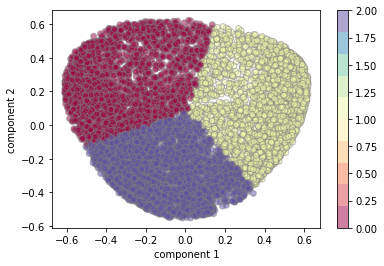

In [19]:
kmeans =  KMeans(n_clusters=3, max_iter=600, algorithm = 'auto')
kmeans.fit(KPca)
KMeans(max_iter=600, n_clusters=3)
plt.scatter(KPca[:, 0], KPca[:, 1],
            c= kmeans.labels_.astype(float), edgecolor='gray', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

- it cluster our data to 3 clusters 

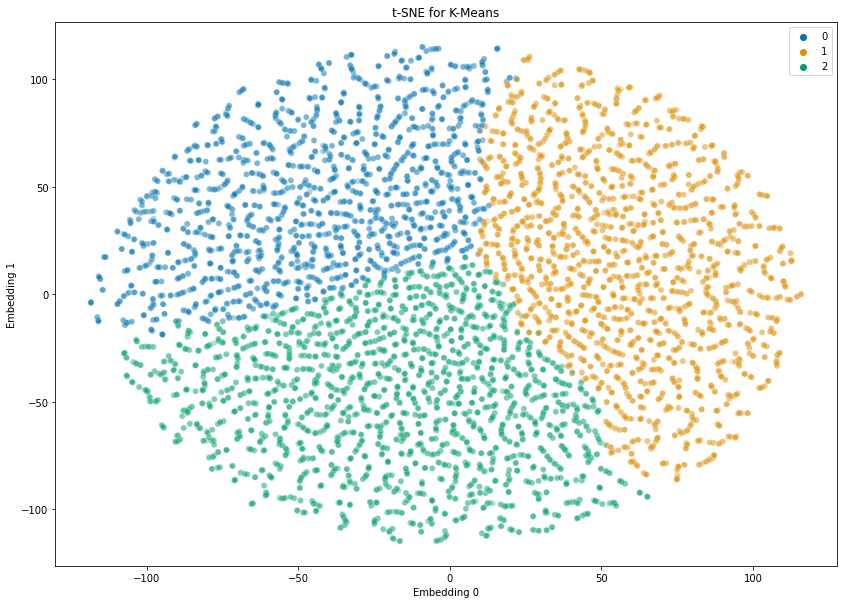

In [20]:
t_sne(embeddings=tsne, labels=kmeans.labels_, title="t-SNE for K-Means")

# Silhouette

- Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1
- If the ground truth labels are not known, evaluation must be performed using the model itself.
- The Silhouette Coefficient (sklearn.metrics.silhouette_score) is an example of such an evaluation,
- where a higher Silhouette Coefficient score relates to a model with better defined clusters.


In [68]:
a = (kmeans.cluster_centers_)

array([[ 0.5462906 , -0.26827322],
       [-0.49137796, -0.0040923 ],
       [ 0.54778319,  0.4920534 ]])

In [21]:
from sklearn.metrics import silhouette_score

score_Kmeans = silhouette_score(KPca, kmeans.labels_, metric='euclidean')
#
# Print the score
#
print('Silhouetter Score: %.3f' % score_Kmeans)

Silhouetter Score: 0.457


- We can say that the clusters are not very well apart from each other as the silhouette score is not closer to 1

In [75]:
# from yellowbrick.cluster import SilhouetteVisualizer
# q, mod = divmod(i, 2)
# visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick',ax =  ax[q-1][mod])
# visualizer.fit(KPca)


In [36]:
df_1["cluster"] = kmeans.labels_.astype(float)

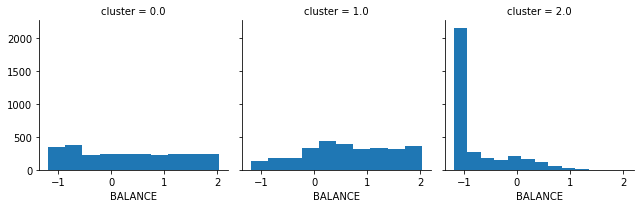

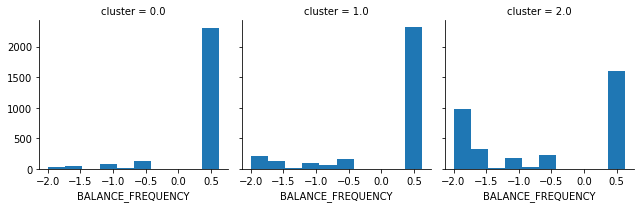

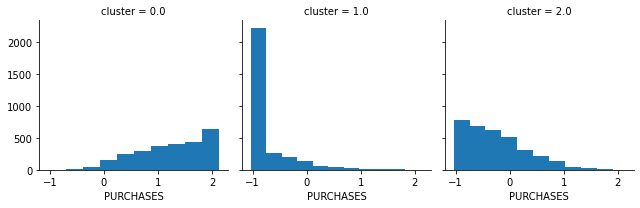

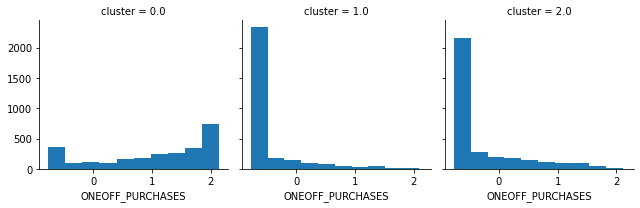

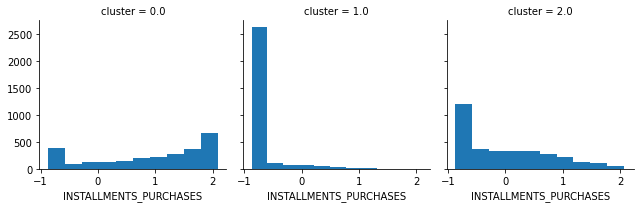

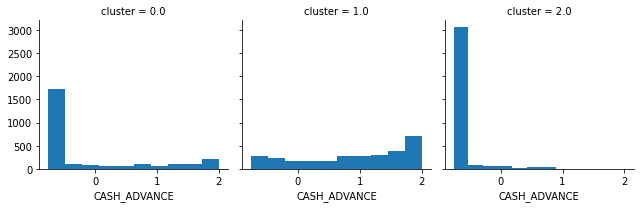

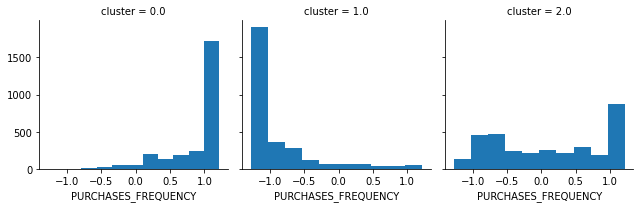

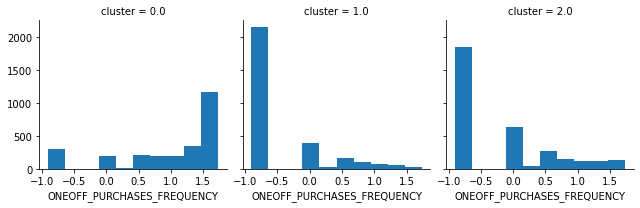

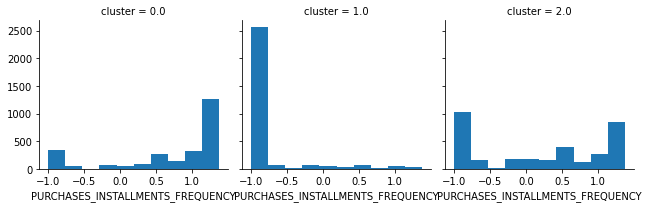

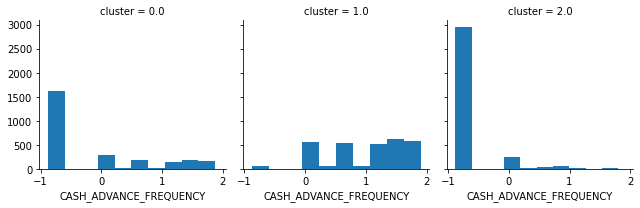

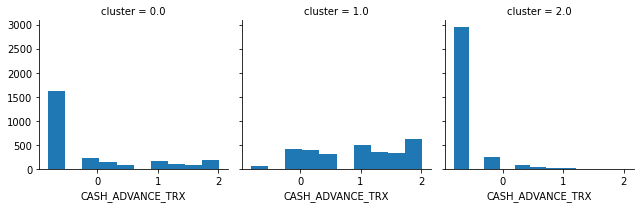

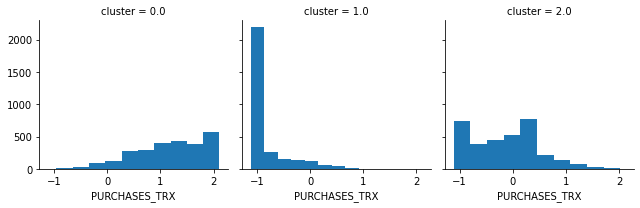

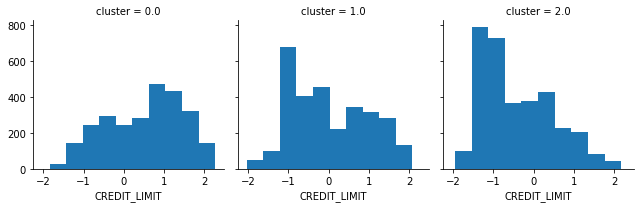

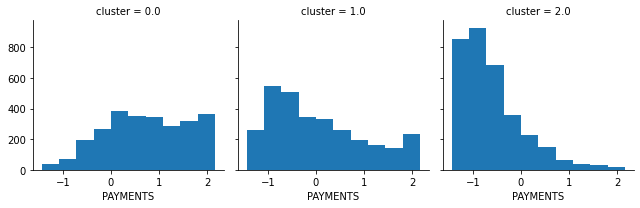

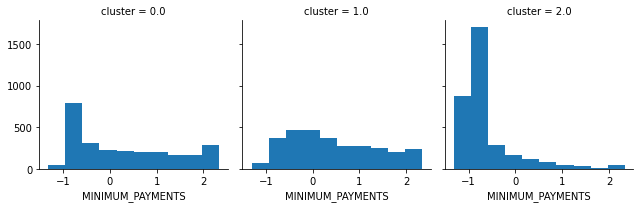

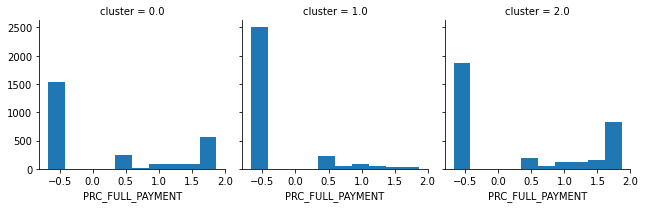

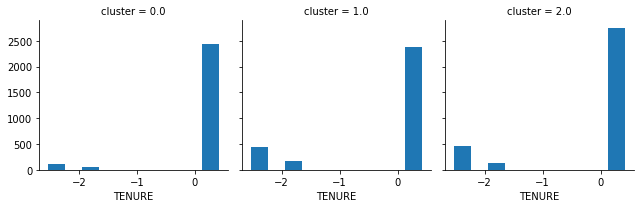

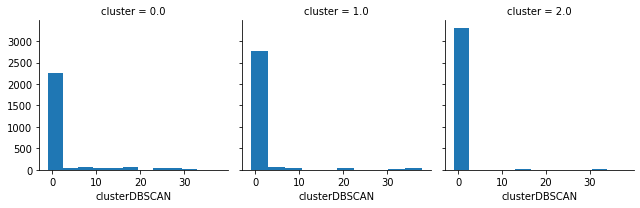

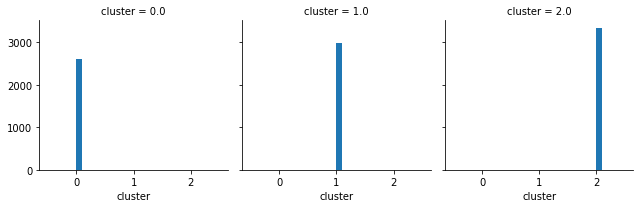

In [37]:
for c in df_1:
    grid= sns.FacetGrid(df_1, col='cluster')
    grid.map(plt.hist, c) 

# Mean_Shift

- it is another powerful clustering algorithm used in unsupervised learning. Unlike K-means clustering, it does not make any assumptions; hence it is a non-parametric algorithm.
- Mean-shift algorithm basically assigns the datapoints to the clusters iteratively by shifting points towards the highest density of datapoints i.e. cluster centroid.
- The difference between K-Means algorithm and Mean-Shift is that later one does not need to specify the number of clusters in advance because the number of clusters will be determined by the algorithm w.r.t data.
# How does it work

- Step 1 − First, start with the data points assigned to a cluster of their own.

- Step 2 − Next, this algorithm will compute the centroids.

- Step 3 − In this step, location of new centroids will be updated.

- Step 4 − Now, the process will be iterated and moved to the higher density region.

- Step 5 − At last, it will be stopped once the centroids reach at position from where it cannot move further.

In [25]:
from sklearn.cluster import MeanShift
mean_shift = MeanShift(bandwidth=0.45, n_jobs=6)
mean_shift.fit(KPca)

MeanShift(bandwidth=0.45, n_jobs=6)

# DBSCAN

- This is a clustering algorithm (an alternative to K-Means) that clusters points together and identifies any points not belonging to a cluster as outliers. It’s like K-means, except the number of clusters does not need to be specified in advance

In [16]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.161, min_samples=10).fit(dfc)
labels = db.labels_

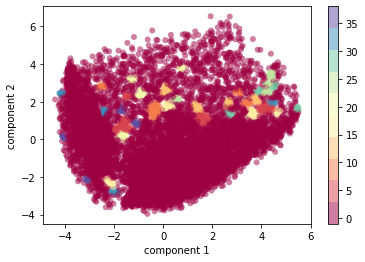

In [17]:
plt.scatter(dfc[:, 0], dfc[:, 1],
            c= labels.astype(float), edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

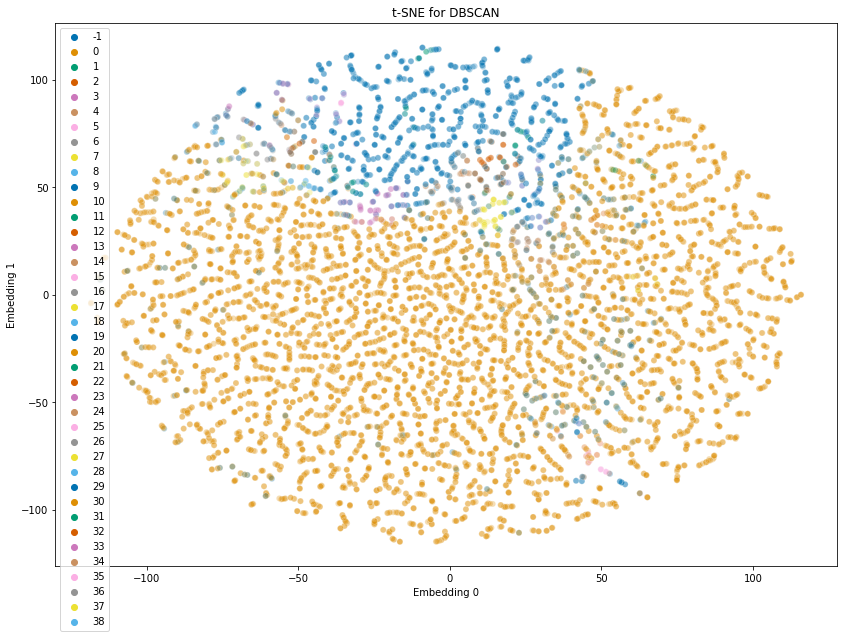

In [26]:
t_sne(embeddings=tsne, labels=labels, title="t-SNE for DBSCAN")

In [33]:

score_DBSCAN = silhouette_score(KPca, db.labels_, metric='euclidean')
#
# Print the score
#
print('Silhouetter Score: %.3f' % score_DBSCAN)

Silhouetter Score: -0.554


- very bad result, this model failed to classify the data

In [27]:
df_1["clusterDBSCAN"] = labels.astype(float)

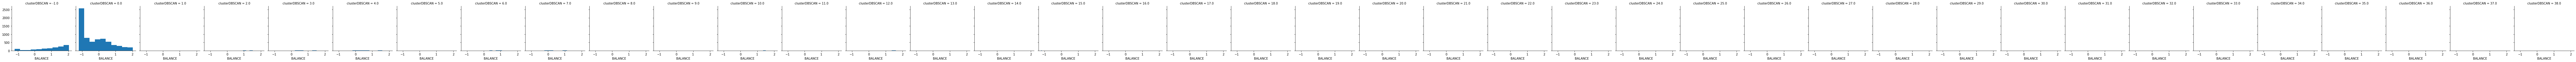

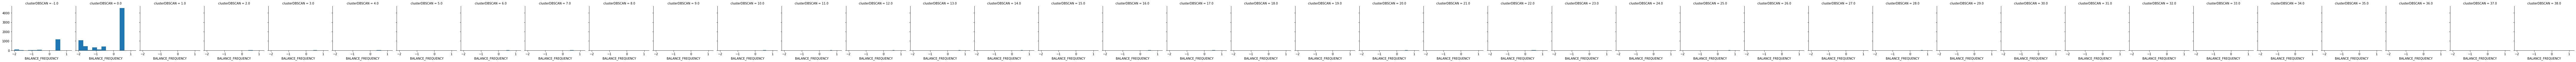

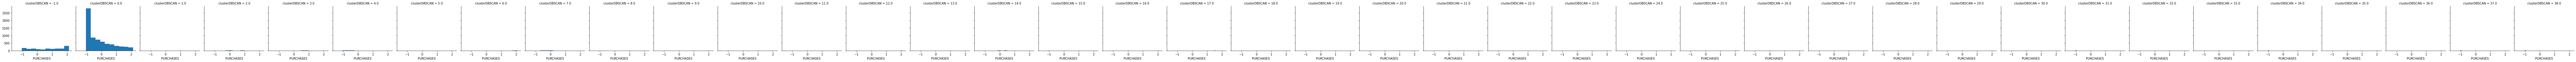

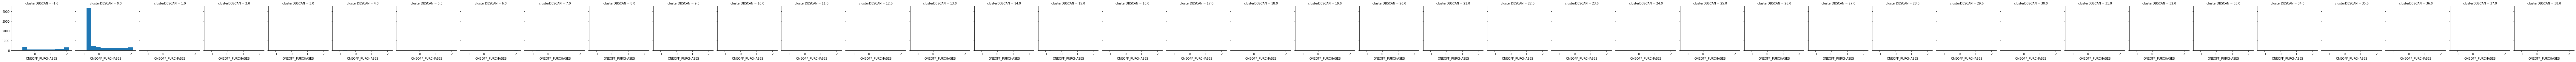

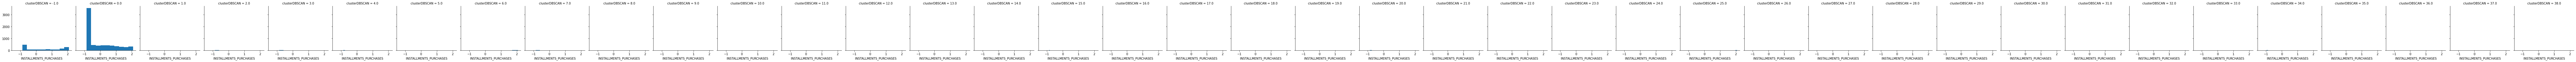

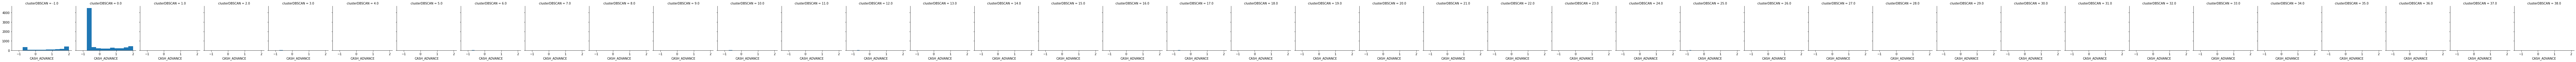

In [ ]:
for c in df_1:
    grid= sns.FacetGrid(df_1, col='clusterDBSCAN')
    grid.map(plt.hist, c)   

# Isolation Forest

- Randomly select a feature and randomly select a value for that feature within its range.
- If the observation’s feature value falls above (below) the selected value, then this value becomes the new min (max) of that feature’s range.
- Check if at least one other observation has values in the range of each feature in the dataset, where some ranges were altered via step 2. If no, then the observation is isolated.
- Repeat steps 1–3 until the observation is isolated. The number of times you had to go through these steps is the isolation number. The lower the number, the more anomalous the observation is.

In [60]:
# instantiate model
#the algorithm uses anomaly scores as a metric
#which represents an average anomaly score of the input sample.
    
from sklearn.ensemble import IsolationForest

model = IsolationForest(n_estimators = 10)
# fit model
model.fit(KPca)

IsolationForest(n_estimators=10)

In [57]:
# predict on new data
#either 1 for normal data and -1 for an outlier.
# x = KPca.iloc[[100]]
# model.predict(x)

array([1])

In [58]:
# model.decision_function(x)

array([0.11205982])

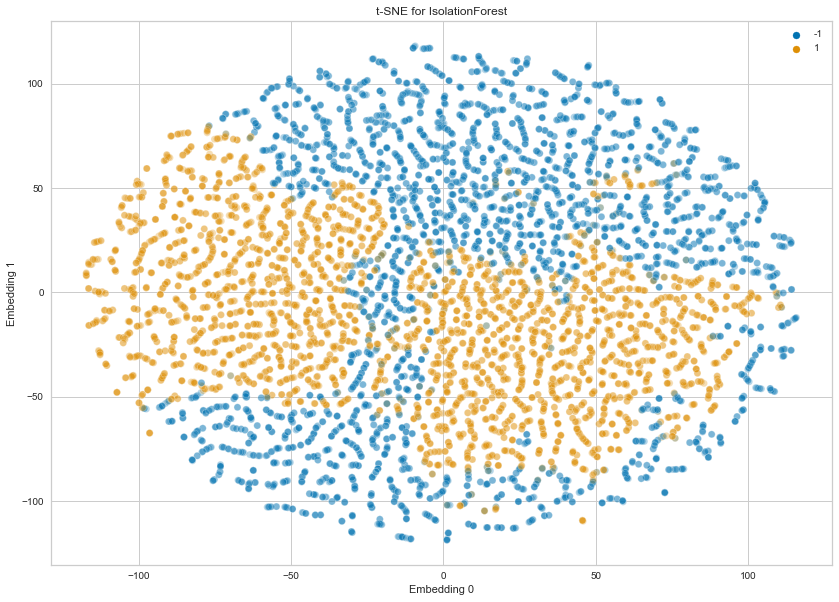

In [61]:
t_sne(embeddings=tsne, labels=model.predict(KPca), title="t-SNE for IsolationForest")

In [80]:

score_Iforest = silhouette_score(KPca, model.predict(KPca), metric='euclidean')
#
# Print the score
#
print('Silhouetter Score: %.3f' % score_Iforest)

Silhouetter Score: 0.082


- very bad result and it is mean that this model does not seperat our data very well

# EM

- The EM algorithm is an iterative approach that cycles between two modes. The first mode attempts to estimate the missing or latent variables, called the estimation-step or E-step. The second mode attempts to optimize the parameters of the model to best explain the data, called the maximization-step or M-step

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

In [49]:
gmm = GaussianMixture(n_components = 2, tol=0.000001)


In [50]:
gmm.fit(KPca)


GaussianMixture(n_components=2, tol=1e-06)

In [51]:
print(gmm.weights_)
print(gmm.means_)

[0.6686678 0.3313322]
[[ 0.07357694  0.00178792]
 [-0.14848702 -0.00360823]]


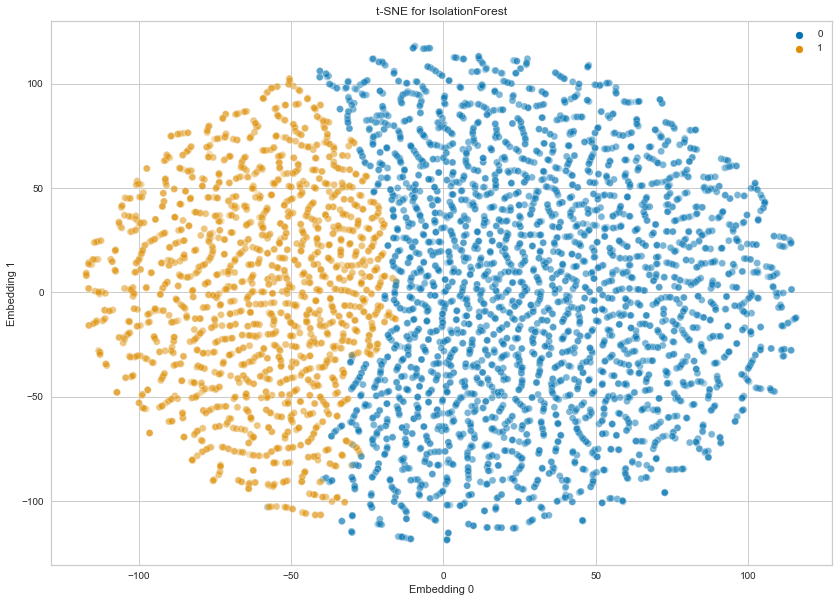

In [52]:
t_sne(embeddings=tsne, labels=gmm.predict(KPca), title="t-SNE for EM")

In [83]:

score_EM = silhouette_score(KPca, gmm.predict(KPca), metric='euclidean')
#
# Print the score
#
print('Silhouetter Score: %.3f' % score_EM)

Silhouetter Score: 0.416


- not very good result  